In [13]:
from utils import read_im, save_im, normalize
import matplotlib.pyplot as plt
import numpy as np


def convolve_im(im, kernel):
    """A function that convolves an RGB image with a kernel.

    Args:
        im (np.array): Image of shape [H, W, 3]
        kernel (np.array): Kernel of shape [K, K] (assumed odd-sized)

    Returns:
        np.array: Convolved image of shape [H, W, 3] (same as im)
    """
    # Flip the kernel both vertically and horizontally
    kernel = np.flipud(np.fliplr(kernel))

    # Get image dimensions
    height, width, channels = im.shape
    k_size = kernel.shape[0]  # Kernel size (assumed square, i.e., KxK)
    pad_size = k_size // 2  # Padding size to keep image same after convolution

    # Prepare output image, initially filled with zeros
    new_image = np.zeros_like(im)

    # Iterate over each channel (R, G, B)
    for c in range(channels):
        # Extract the current channel
        channel = im[:, :, c]

        # Iterate over each pixel in the image
        for i in range(height):
            for j in range(width):
                # Initialize the convolution sum for this pixel
                conv_sum = 0.0

                # Iterate over the kernel
                for m in range(-pad_size, pad_size + 1):
                    for n in range(-pad_size, pad_size + 1):
                        # Calculate the pixel location for image, considering kernel's offset
                        x = i + m
                        y = j + n

                        # Check if the pixel location is within image bounds
                        if 0 <= x < height and 0 <= y < width:
                            # Apply the kernel multiplication
                            conv_sum += (
                                channel[x, y] * kernel[m + pad_size, n + pad_size]
                            )

                # Store the convolution result in the new image
                new_image[i, j, c] = conv_sum

    return new_image



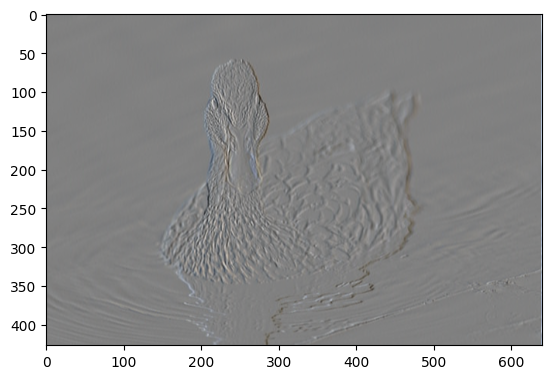

In [14]:
h_a = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1],
    ]
)

im = read_im("images/duck.jpeg")
im_sobel = convolve_im(im, h_a)
im_sobel = normalize(im_sobel)

plt.imshow(im_sobel)
save_im("results/duck_sobel.jpeg", im_sobel)


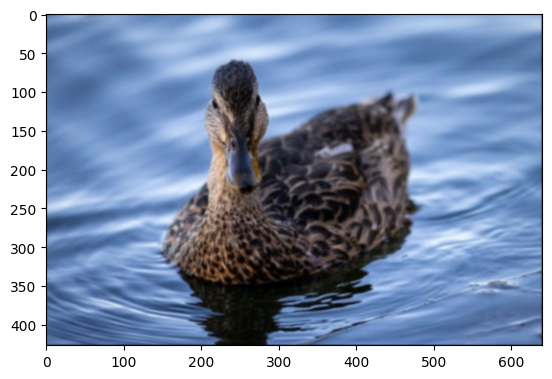

In [15]:
h_b = (1 / 256 * np.array(
        [
            [1, 4, 6, 4, 1],
            [4, 16, 24, 16, 4],
            [6, 24, 36, 24, 6],
            [4, 16, 24, 16, 4],
            [1, 4, 6, 4, 1],
        ]
    )
)

im_smoothed = convolve_im(im, h_b)
im_smoothed = normalize(im_smoothed)

plt.imshow(im_smoothed, cmap="gray")
save_im("results/duck_smoothed.jpeg", im_smoothed)
